# TASK 1 | Data Science Internship
# IRIS DATASET CLASSIFICATION USING SUPERVISED LEARNING

# Author: Yusra Shereen

### Importing the Libraries


In [2]:
import pandas as pd, scipy, numpy as np
import sklearn.preprocessing
from matplotlib import pyplot as plt
%matplotlib inline

### Loading the iris dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species'] 

In [11]:
ds_iris = pd.read_csv('/content/drive/MyDrive/Data Science Internship/iris.data', names = headernames)
ds_iris.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
print(ds_iris)

     sepal-length  sepal-width  petal-length  petal-width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


### **Encoding Labels**

In [13]:
from sklearn.preprocessing import LabelEncoder

l_en = LabelEncoder()
ds_iris['species']= l_en.fit_transform(ds_iris['species'])
ds_iris.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Splitting up in feature attributes and class variable

In [14]:
x = ds_iris.iloc[:, :-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
y=ds_iris.iloc[:, 4].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Dealing with Missing Values

In [16]:
ds_iris.isna().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

As given in documentation of dataset that dataset has no missing values or no attribute that has missing values







## Normalizing values of variables 

In [17]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(x)
normalizedX = scaler.transform(x)
normalizedX

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

## **Visualizing Data**

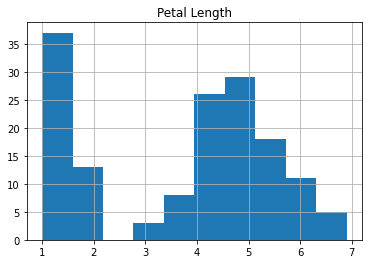

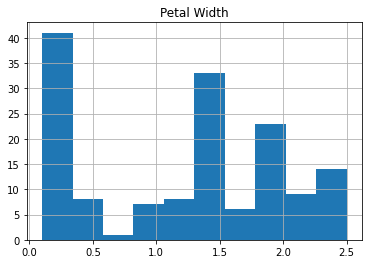

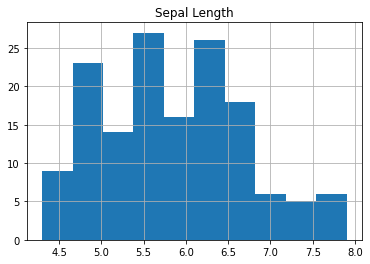

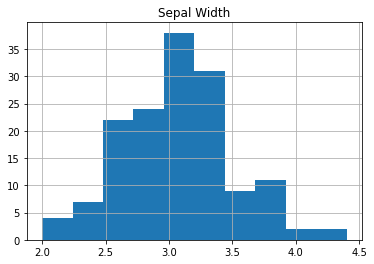

In [26]:
ds_iris['petal-length'].hist()
plt.title('Petal Length')
plt.show()
ds_iris['petal-width'].hist()
plt.title('Petal Width')
plt.show()
ds_iris['sepal-length'].hist()
plt.title('Sepal Length')
plt.show()
ds_iris['sepal-width'].hist()
plt.title('Sepal Width')
plt.show()



### **Train and Test Split**
Next, we will divide the data into train and test split. Following code will split the dataset into 60% training data and 40% of testing data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.40)
print(X_train.shape)
print(X_test.shape)

print(X_train)
print('*************************************************************************')
print(X_test)

(90, 4)
(60, 4)
[[5.5 2.6 4.4 1.2]
 [4.6 3.6 1.  0.2]
 [6.  2.2 4.  1. ]
 [5.4 3.4 1.7 0.2]
 [7.9 3.8 6.4 2. ]
 [6.4 2.9 4.3 1.3]
 [4.8 3.  1.4 0.1]
 [6.7 3.  5.  1.7]
 [6.2 3.4 5.4 2.3]
 [7.7 3.  6.1 2.3]
 [5.8 2.7 3.9 1.2]
 [6.2 2.9 4.3 1.3]
 [7.2 3.  5.8 1.6]
 [5.6 3.  4.1 1.3]
 [6.5 3.  5.8 2.2]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [4.9 3.1 1.5 0.1]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [4.3 3.  1.1 0.1]
 [6.3 2.5 4.9 1.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.8 1.1]
 [4.6 3.2 1.4 0.2]
 [5.7 2.9 4.2 1.3]
 [4.8 3.4 1.6 0.2]
 [5.8 2.6 4.  1.2]
 [6.  2.2 5.  1.5]
 [6.7 3.  5.2 2.3]
 [5.4 3.9 1.7 0.4]
 [7.3 2.9 6.3 1.8]
 [5.5 2.3 4.  1.3]
 [5.  3.2 1.2 0.2]
 [6.7 3.3 5.7 2.1]
 [4.9 2.4 3.3 1. ]
 [6.9 3.1 4.9 1.5]
 [6.1 3.  4.6 1.4]
 [6.2 2.2 4.5 1.5]
 [6.4 3.2 4.5 1.5]
 [5.  3.  1.6 0.2]
 [5.5 3.5 1.3 0.2]
 [6.1 2.8 4.  1.3]
 [5.7 2.6 3.5 1. ]
 [4.7 3.2 1.3 0.2]
 [6.8 2.8 4.8 1.4]
 [6.3 2.3 4.4 1.3]
 [5.2 4.1 1.5 0.1]
 [6.5 3.2 5.1 2

### Training a KNN Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 13)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

### Making the Predictions

In [43]:
y_pred = classifier.predict(X_test)

### Output

Confusion Matrix:
[[21  0  0]
 [ 0 15  1]
 [ 0  2 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      0.94      0.91        16
           2       0.95      0.91      0.93        23

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

Accuracy: 0.95


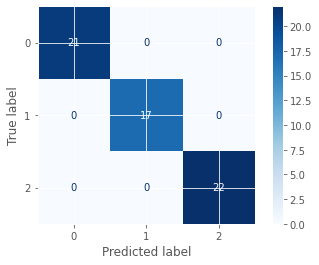

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
plot_confusion_matrix(classifier, X_test,y_pred,cmap=plt.cm.Blues)

In [35]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[2 0 0 1 2 2 0 2 2 1 0 1 2 2 0 2 1 1 2 1 0 0 2 0 1 0 2 2 0 2 0 0 1 1 1 0 0
 1 2 1 2 1 1 2 0 2 2 0 2 2 0 2 1 0 0 0 2 1 0 2]


### **Analysis Of performance while varying the number of neighbours in K Nearest Neighbour Classifer** 

At 3 nearest neighbors model predicts 93.3% correctly, but for k = 5,7, 9,and 11 model accuracy is 96.7%. 
So k = 7 is used.

### K-fold Crossvalidation
K-Folds cross-validator provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default). Each fold is then used once as a validation while the k - 1 remaining folds form the training set.


In [45]:
from sklearn.model_selection import KFold
# prepare cross validation
kfold = KFold(2, True) # value of K and shuffle? 
# enumerate splits
for train, test in kfold.split(X_train):
    print('train: %s, test: %s' % (X_train[train], X_train[test]))
   

train: [[-0.42911515 -1.03531433  0.38646697  0.04082105]
 [ 0.1762197  -2.01872637  0.15105562 -0.23131928]
 [-0.55018212  0.93150973 -1.20255967 -1.3198806 ]
 [ 2.47649213  1.91492176  1.56352375  1.12938237]
 [-1.27658394 -0.0519023  -1.37911819 -1.45595077]
 [ 0.41835364 -0.29775531  0.32761414  0.17689121]
 [-1.03445     0.93150973 -1.32026535 -1.3198806 ]
 [-1.76085182 -0.29775531 -1.37911819 -1.3198806 ]
 [ 0.53942061 -1.28116734  0.68073117  0.44903154]
 [-1.27658394  0.93150973 -1.08485399 -1.3198806 ]
 [-1.03445     1.17736274 -1.26141251 -0.77559994]
 [-0.42911515 -1.52702035  0.03334994 -0.09524912]
 [-1.51871788  0.43980371 -1.37911819 -1.3198806 ]
 [-0.18698121 -0.29775531  0.2687613   0.17689121]
 [-0.06591424 -1.03531433  0.15105562  0.04082105]
 [ 0.1762197  -2.01872637  0.73958401  0.44903154]
 [ 1.02368849 -0.0519023   0.85728968  1.53759286]
 [-0.42911515 -1.77287336  0.15105562  0.17689121]
 [ 1.02368849  0.68565672  1.15155388  1.26545253]
 [-1.15551697 -1.5270203

In [46]:
for train, test in kfold.split(x):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    result = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(y_test, y_pred)
    print("Classification Report:",)
    print (result1)
    result2 = accuracy_score(y_test,y_pred)
    print("Accuracy:",result2)

Confusion Matrix:
[[21  0  0]
 [ 0 15  1]
 [ 0  2 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      0.94      0.91        16
           2       0.95      0.91      0.93        23

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

Accuracy: 0.95
Confusion Matrix:
[[21  0  0]
 [ 0 15  1]
 [ 0  2 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      0.94      0.91        16
           2       0.95      0.91      0.93        23

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

Accuracy: 0.95
